![](Rydiqule_Logo_Transparent_300.png)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import rydiqule as rq
from rydiqule.sensor_utils import get_rho_ij

# Three dimensional hybrid doppler

This example follows the four photon excitation pathway in $Cs$ vapor given in Kondo et al. (https://arxiv.org/pdf/1510.01729). This pathway follows the ladder scheme $6S_{1/2} \rightarrow 6P_{3/2} \rightarrow 7S_{1/2} \rightarrow 8P_{1/2} \rightarrow 52D_{3/2}$ in cesium with corresponding optical fields 852 nm, 1470 nm, 1394 nm, and 1770 nm. These fields are labelled probe, dressing 1, dressing 2, and Rydberg, respectively.

We demonstrate using rydiqule to solve this system with the collinear configuration and with a doppler-free configuration. We include the disclaimer that we ignore the hyperfine structure present in the paper. The purpose of this example, is to show that with `solve_doppler_hybrid`, doppler averaging over 3 spatial dimensions is now a tractible computation compared to averaging with `solve_steady_state`.

In [4]:
# parameters for Cell
atom = 'Cs'

states = [
    rq.A_QState(6,0,1/2),
    rq.A_QState(6,1,3/2),
    rq.A_QState(7,0,1/2),
    rq.A_QState(8,1,1/2),
    rq.A_QState(52,2,3/2)
]

sensor = rq.Cell(atom, states)

In [6]:
# laser parameters
detunings = 2*np.pi*np.linspace(-10,10,201)
Omega_p = 2*np.pi*2
Omega_d1 = 2*np.pi*10
Omega_d2 = 2*np.pi*12
Omega_R = 2*np.pi*1

## Collinear configuration

In [7]:
kunit1 = np.array([-1,0,0])
kunit2 = np.array([1,0,0])

probe = {'states': (states[0],states[1]), 'detuning': 0, 'rabi_frequency': Omega_p, 'kunit': kunit1}
dressing1 = {'states': (states[1],states[2]), 'detuning': 0, 'rabi_frequency': Omega_d1, 'kunit': kunit2}
dressing2 = {'states': (states[1],states[2]), 'detuning': 0, 'rabi_frequency': Omega_d2, 'kunit': kunit2}
Rydberg = {'states': (states[2],states[3]), 'detuning': detunings, 'rabi_frequency': Omega_R, 'kunit': kunit2}

sensor.add_couplings(probe, dressing1, dressing2, Rydberg)
sols_col = rq.solve_doppler_hybrid(sensor)

Text(0, 0.5, 'Im($\\rho_{10}$)')

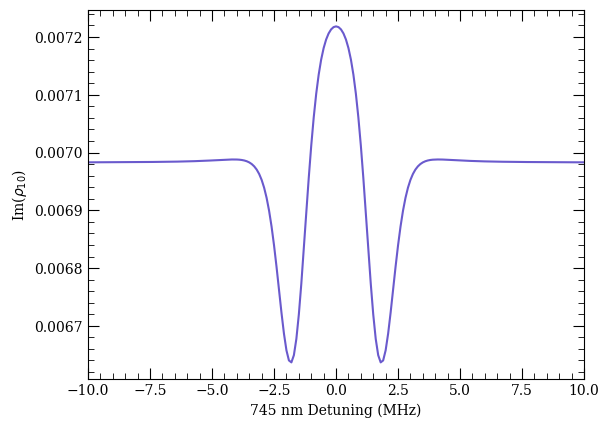

In [21]:
fig, ax = plt.subplots()
ax.plot(detunings/(2*np.pi), get_rho_ij(sols_col.rho,1,0).imag, c='slateblue')
ax.set_xlabel("745 nm Detuning (MHz)")
ax.set_xlim(-10,10)
ax.set_ylabel(r"Im($\rho_{10}$)")

## Doppler-free configuration

In [30]:
# 4 photon
detunings = 2*np.pi*np.linspace(-10,10,101)

theta_p, phi_p = np.pi/2, 0
theta_d1, phi_d1 = 0.3834, np.pi
theta_d2, phi_d2 = 2.1039, 2.6072
theta_R, phi_R = 2.0598, 3.8249

kunitp = np.array([np.sin(theta_p)*np.cos(phi_p), np.sin(theta_p)*np.sin(phi_p), np.cos(theta_p)])
kunitd1 = np.array([np.sin(theta_d1)*np.cos(phi_d1), np.sin(theta_d1)*np.sin(phi_d1), np.cos(theta_d1)])
kunitd2 = np.array([np.sin(theta_d2)*np.cos(phi_d2), np.sin(theta_d2)*np.sin(phi_d2), np.cos(theta_d2)])
kunitR = np.array([np.sin(theta_R)*np.cos(phi_R), np.sin(theta_R)*np.sin(phi_R), np.cos(theta_R)])

probe = {'states': (states[0],states[1]), 'detuning': 0, 'rabi_frequency': Omega_p, 'kunit': kunitp}
dressing1 = {'states': (states[1],states[2]), 'detuning': 0, 'rabi_frequency': Omega_d1, 'kunit': kunitd1}
dressing2 = {'states': (states[1],states[2]), 'detuning': 0, 'rabi_frequency': Omega_d2, 'kunit': kunitd2}
Rydberg = {'states': (states[2],states[3]), 'detuning': detunings, 'rabi_frequency': Omega_R, 'kunit': kunitR}

sensor.add_couplings(probe, dressing1, dressing2, Rydberg)

In [31]:
sols_DF = rq.solve_doppler_hybrid(sensor, analytic_axis=0)

Breaking parameter stack into 8 slices...


Text(0, 0.5, 'Im($\\rho_{10}$)')

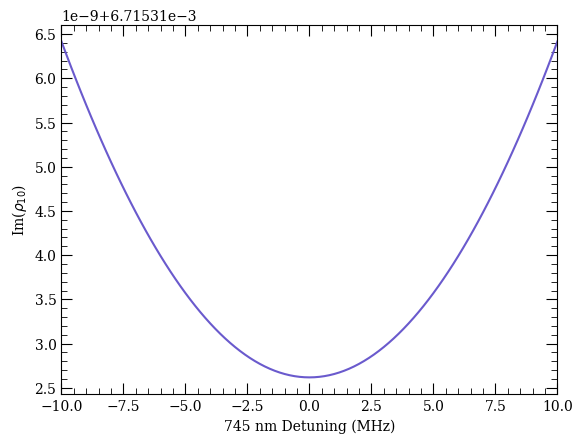

In [33]:
fig, ax = plt.subplots()
ax.plot(detunings/(2*np.pi), get_rho_ij(sols_DF.rho,1,0).imag, c='slateblue')
ax.set_xlabel("745 nm Detuning (MHz)")
ax.set_xlim(-10,10)
ax.set_ylabel(r"Im($\rho_{10}$)")

In [36]:
from rydiqule.slicing.slicing import get_slice_num, get_slice_num_hybrid

get_slice_num(n=sensor.basis_size, stack_shape = (101,), doppler_shape=(601, 601, 601), sum_doppler=True, weight_doppler=True, debug=True)

Total available memory: 215.64 GiB
Min Req memory to solve: 1009.2 GiB
Req memory per EOM: 1009.2 GiB
Req memory for full solve: 1.0193e+05 GiB
	Mandatory memory use: 5.5686e-05 GiB
	Memory use for all EOMs: 1.0193e+05 GiB
	Full output solution size: 1.806e-05 GiB
Available memory for sliced solves: 215.64 GiB


RydiquleError: System is too large to solve. Need at least 1009.2486083358526 GiB

In [37]:
get_slice_num_hybrid(n=sensor.basis_size, param_stack_shape=(101,), numeric_doppler_shape=(601,601), debug=True)

--- Hybrid Solver Memory Debug ---
Total available RAM: 218.7 GiB
Min Req memory to solve: 15.54 GiB
Req memory for full solve: 1570 GiB
	Full output solution size: 1.8813e-05 GiB
Available memory for sliced calculations: 218.7 GiB
Calculated minimum slices needed: 8.0
Final number of slices to be used: 8
------------------------------------


(8, (101, 25))

In [38]:
print(f'Solve memory requirement reduced by x{1.0193e+05/1570:.0f}')

Solve memory requirement reduced by x65


In [39]:
rq.about()


        Rydiqule
    
Rydiqule Version:     2.0.1.dev19
Installation Path:    ~\Documents\GitHub\rydiqulepublic\src\rydiqule

      Dependencies
    
NumPy Version:        2.0.1
SciPy Version:        1.15.3
Matplotlib Version:   3.10.0
ARC Version:          3.8.1
Python Version:       3.11.13
Python Install Path:  ~\miniconda3\envs\rydiqule1
Platform Info:        Windows (AMD64)
CPU Count and Freq:   16 @ 3.91 GHz
Total System Memory:  256 GB
